<a href="https://colab.research.google.com/github/atp800/dsc-guestbook/blob/master/MNIST_Dense_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NOTE:** The code below indicates the libraries needed to run a fully connected neural network. 
### Text in orange explains each code line and the related import files. 

### **DEFINITIONS: **

**Dense**: A normal feed-forward layer, composed of plain neurons.

**Dropout**:  The process of turning off a percentage of the weights in a layer during training. This prevents the network from overfitting.

**Flatten**: The process of flattening a 2d array into a 1d list. This is used if we have an array that we want to feed into a dense layer.

**Activation Function**: In each neuron, this is a function that basically serves to normalize the values passing through the network. Each value that passes through a neuron is run through this function.

**Conv2D**: A 2D convolutional layer - used for convolving on images + feature maps.

**MaxPooling2D**: A method of shrinking 2D arrays inside of the network. It can half the size of an array by looking at nearby values and only keeping larger values

**MaxPooling1D**: The same process as Max Pooling in 2D, except in 1D (think applied to a list of numbers)

**Keras**: The neural network library that has all of these different types of layers, and that lets us compose a network from them and train it.

In [25]:
from __future__ import print_function
import keras # a machine learning library that lets you create neural networks
from keras.datasets import mnist # the needed dataset
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Activation # importing different types of layers that you can use with your model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D # same as above
from keras import backend as K
import random # lets us generate random numbers - used when looking at random entries from the dataset.
import matplotlib # lets us display images
import numpy as np # library for delaing with arrays of numbers - the data is represented as an array
import tensorflow as tf # the backend machine learning library that keras relies on
import matplotlib.pyplot as plt #for charts at end

## NOTE: This line downloads the dataset and stores it in the x_train, y_train, x_test, and y_test variables


In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # downloading the MNIST dataset

## NOTE: We visualize the data as hand-drawn numbers. The computer repackages this into data that it can understand. This data is aggregated together in the form of an array (also known as a matrix). 

# Visualization of the MNIST data

What you see:

![img](https://www.tensorflow.org/versions/r0.11/images/MNIST.png)

What the network "sees":

![img](https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png)

## NOTE: Run this chunk of code to look at a random entry in the MNIST dataset, and it's accompanying ground truth (the picture of a number will be accompanied by the text of the digit corresponding to that number.)

### Ex. a drawing of a 3 will be accompanied by a 3. 

The ground truth for this entry is: 6


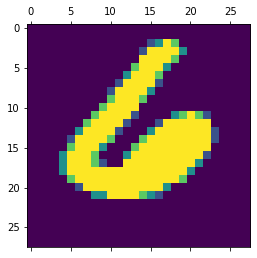

In [27]:
# Run this cell to look at a random entry in the dataset!
ind = random.choice(range(len(x_train)))
matplotlib.pyplot.matshow(x_train[ind])
print("The ground truth for this entry is: " + str((y_train[ind])))


## NOTE: This chunk of code defines some parameters for training.

### **DEFINITIONS:**

**Batch Size**: How many handwritten digits the network calculates the error for before performing backpropagation (Backpropagation is the process of adjusting all of the weights of the network to minimize error in the network's predictions. Read more [here](https://en.wikipedia.org/wiki/Backpropagation).)

**num_classes**: how many types of numbers there are in the dataset (10) - used to determine how many neurons are in the last layer of the neural network

**epochs**: how many times the network will look at and train on the entire dataset. For example, if you set epochs = 2, the network will iterate over and train on the entire dataset two times. More epochs usually mean better accuracy, but at the cost of time.


In [28]:
# just defining some parameters to train the network
batch_size = 128
num_classes = 10 # how many different "classes" of numbers there are
epochs = 5 # how many times the network will look at the entire dataset

## NOTE: The following two chunks of code help prepare the MNIST data into the right shape and format for the network to train on.

You can think of "shape" as the length of a list of numbers, or the height and width of a 2D grid of numbers (an array), or the height, width, and depth of a 3D grid of numbers (a tensor).

The network needs data with a specific input shape.

Our data is represented as one channel, which means that the input image is black and white. Generally a total of three channels exist for RGB images (we typically see 1 or 3 for images, as images are either black & white or RGB). Our data is tranformed into a 28x28 image which means that our picture is an array with a length of 28 and a height of 28, and each value in that array corresponds to the brightness of that pixel. The shape is (28x28x1) - with the 1 designating the channel.


The code below ensures that the MNIST data conforms to the proper desired format.

In [29]:
img_rows, img_cols = 28, 28 # the "shape" of the input data; we need to define that the images are 28x28, 

In [30]:
if K.image_data_format() == 'channels_first': # code for flattening the images into 28x28x1 (black and white) instead of 28x28x3 (rgb full color images)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

## NOTE: The network needs an array of values between 0 and 1. In normal images, each pixel is represented by a value between 0 and 255 (0 for black, 255 for white). All that we're doing in this line of code is dividing each number in the image by 255 - so that now the scale will be 0 for black, and 1 for white.

In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'numbers the network will learn from (train on)')
print(x_test.shape[0], 'numbers the network will not learn from (will only be used for testing)')

x_train shape: (60000, 28, 28, 1)
60000 numbers the network will learn from (train on)
10000 numbers the network will not learn from (will only be used for testing)


### Applying One hot encoding for the data
    One hot encoding basically is this,
For example you have digits 0 to 9 in your data and every image corresponds to a digit such as 3
In order to make this data understandable by the neural network we need to convert our 3 to one hot encoding which is,
One Hot : 	[0 0 0 1 0 0 0 0 0 0]
Normal :	[0 1 2 3 4 5 6 7 8 9]

In [32]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Creating the actual NN

## Basic dense network

`model.add(Flatten(input_shape=input_shape))`

This line just flattens the 2D input to a 1D list of numbers that you can feed into a fully connected layer.


`model.add(Dense(128))`

The 128 in this line is just how many neurons are in that layer.

**DEFINITIONS**:

**dense**: a linear network operation.

**sigmoid**: wide s-shaped function (slide 44 of 70 [link text](https://www.slideshare.net/GauravMittal68/convolutional-neural-networks-cnn))

**tanh**: narrow s-shaped function (slide 44 of 70 [link text](https://www.slideshare.net/GauravMittal68/convolutional-neural-networks-cnn))

**linear**: ReLU (slide 44 of 70 [link text](https://www.slideshare.net/GauravMittal68/convolutional-neural-networks-cnn))



In [33]:
model = Sequential()

# your neural network goes here:
# ----------------------------- #


model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(200))

#model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))


# ----------------------------- #
# end your neural network

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 200)               25800     
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


## NOTE: Compiling the model: this is where we define the loss function (how the network calculates error).

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

## NOTE: Training the Model: next we want to train our model on the data set that we imported earlier in the code. 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.7381 - accuracy: 0.7496 - val_loss: 0.3668 - val_accuracy: 0.8874
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.2383 - accuracy: 0.9289 - val_loss: 0.1854 - val_accuracy: 0.9452
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1629 - accuracy: 0.9514 - val_loss: 0.1659 - val_accuracy: 0.9517
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.1255 - accuracy: 0.9621 - val_loss: 0.1407 - val_accuracy: 0.9603
Epoch 5/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.1043 - accuracy: 0.9684 - val_loss: 0.1060 - val_accuracy: 0.9688
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


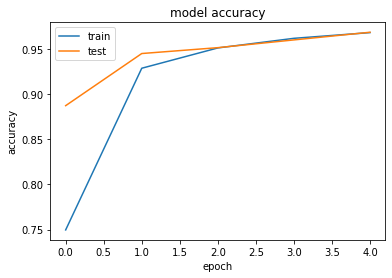

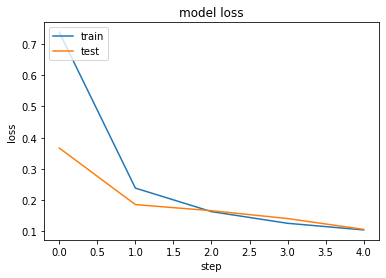

In [35]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NOTE: Evaluating the network: finally we want to evaluate the model to see how accurate it was in its predictive capabilities. 

**Test loss**: error that the network has on the test set measured as the distance metric from the desired outcome and the predicted outcome. 

**Test accuracy**: how accurate the network's prediction was on the data set it was presented with. 

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10601980937262998
Test accuracy: 0.9688000082969666
